In [1]:
pip install google-api-python-client


  Using cached google_api_python_client-2.111.0-py2.py3-none-any.whl.metadata (6.6 kB)
  Using cached httplib2-0.22.0-py3-none-any.whl (96 kB)
  Using cached google_auth-2.25.2-py2.py3-none-any.whl.metadata (4.7 kB)
  Using cached google_auth_httplib2-0.2.0-py2.py3-none-any.whl.metadata (2.2 kB)
  Using cached google_api_core-2.15.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached uritemplate-4.1.1-py2.py3-none-any.whl (10 kB)
  Using cached googleapis_common_protos-1.62.0-py2.py3-none-any.whl.metadata (1.5 kB)
  Using cached protobuf-4.25.1-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached cachetools-5.3.2-py3-none-any.whl.metadata (5.2 kB)
  Using cached pyasn1_modules-0.3.0-py2.py3-none-any.whl (181 kB)
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached pyasn1-0.5.1-py2.py3-none-any.whl.metadata (8.6 kB)
  Using cached charset_n

In [2]:
pip install oauth2client

     ---------------------------------------- 0.0/98.2 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/98.2 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/98.2 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/98.2 kB ? eta -:--:--
     ----------- -------------------------- 30.7/98.2 kB 119.1 kB/s eta 0:00:01
     ----------- -------------------------- 30.7/98.2 kB 119.1 kB/s eta 0:00:01
     --------------- ---------------------- 41.0/98.2 kB 122.9 kB/s eta 0:00:01
     ----------------------- -------------- 61.4/98.2 kB 182.2 kB/s eta 0:00:01
     ----------------------------------- -- 92.2/98.2 kB 238.1 kB/s eta 0:00:01
     ----------------------------------- -- 92.2/98.2 kB 238.1 kB/s eta 0:00:01
     -------------------------------------- 98.2/98.2 kB 208.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas


  Using cached pandas-2.1.4-cp311-cp311-win_amd64.whl.metadata (18 kB)
  Using cached numpy-1.26.2-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
Using cached pandas-2.1.4-cp311-cp311-win_amd64.whl (10.6 MB)
Using cached numpy-1.26.2-cp311-cp311-win_amd64.whl (15.8 MB)
Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)


In [34]:
pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/160.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/160.4 kB ? eta -:--:--
     -- ------------------------------------- 10.2/160.4 kB ? eta -:--:--
     ------- ----------------------------- 30.7/160.4 kB 435.7 kB/s eta 0:00:01
     ------- ----------------------------- 30.7/160.4 kB 435.7 kB/s eta 0:00:01
     ------------------------- ---------- 112.6/160.4 kB 544.7 kB/s eta 0:00:01
     ---------------------------------- - 153.6/160.4 kB 706.2 kB/s eta 0:00:01
     ------------------------------------ 160.4/160.4 kB 600.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.6 MB 991.0 kB/s eta 0:00:08
   ---------------------------------------- 0.1/7.6 MB 787.7 kB/s eta 0:00:10
    --------------------------------------- 0.1/7.6 MB 901.1 kB/s eta 0:00:09
    --------

In [35]:
from config.config import YOUTUBE_API_KEY
from googleapiclient.discovery import build
import pandas as pd
from IPython.display import JSON
import matplotlib.pyplot as plt

In [4]:
import re

In [5]:
youtube = build('youtube', 'v3', developerKey= YOUTUBE_API_KEY)

In [6]:
# Türkiye'de en çok izlenen "Data Science" videoları
search_response = youtube.search().list(
    q='Data Science',
    type='video',
    part='id,snippet',
    maxResults=10,  # max 10 video olsun
    regionCode='TR',  # Türkiye'nin bölge kodu
    order='viewCount'  # İzlenme sayısına göre sırala
).execute()

In [7]:
print(search_response)

{'kind': 'youtube#searchListResponse', 'etag': 'quXkYa6myG_MOQtLQGq2UkNacSI', 'nextPageToken': 'CAoQAA', 'regionCode': 'TR', 'pageInfo': {'totalResults': 1000000, 'resultsPerPage': 10}, 'items': [{'kind': 'youtube#searchResult', 'etag': 'OwHgfQLau6iRRaEPrRzC1gwefQ4', 'id': {'kind': 'youtube#video', 'videoId': '1Q50kYnu9Zc'}, 'snippet': {'publishedAt': '2022-05-01T20:45:00Z', 'channelId': 'UCAigp2nt4ZqzSH10J1u_Snw', 'title': 'Elon Musk Laughs at the Idea of Getting a PhD... and Explains How to Actually Be Useful!', 'description': '', 'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/1Q50kYnu9Zc/default.jpg', 'width': 120, 'height': 90}, 'medium': {'url': 'https://i.ytimg.com/vi/1Q50kYnu9Zc/mqdefault.jpg', 'width': 320, 'height': 180}, 'high': {'url': 'https://i.ytimg.com/vi/1Q50kYnu9Zc/hqdefault.jpg', 'width': 480, 'height': 360}}, 'channelTitle': 'Inspire Greatness', 'liveBroadcastContent': 'none', 'publishTime': '2022-05-01T20:45:00Z'}}, {'kind': 'youtube#searchResult', 'etag'

In [8]:
JSON(search_response)

<IPython.core.display.JSON object>

In [9]:
videos = []
for search_result in search_response.get('items', []):
    video = {
        'Video Title': search_result['snippet']['title'],
        'Video ID': search_result['id']['videoId'],
        'Channel Title': search_result['snippet']['channelTitle'],
        'Publish Time': search_result['snippet']['publishedAt']
    }
    videos.append(video)

# df
df = pd.DataFrame(videos)

In [10]:
df

,Video Title,Video ID,Channel Title,Publish Time
0,Elon Musk Laughs at the Idea of Getting a PhD....,1Q50kYnu9Zc,Inspire Greatness,2022-05-01T20:45:00Z
1,Fight With Data Scientist #standupcomedy #crow...,rLoecC__oL4,Hannah Berner,2022-10-07T17:16:29Z
2,R Programming Tutorial - Learn the Basics of S...,_V8eKsto3Ug,freeCodeCamp.org,2019-06-06T14:12:38Z
3,Data Science In 5 Minutes | Data Science For B...,X3paOmcrTjQ,Simplilearn,2018-12-04T14:30:01Z
4,Data Science Internship Program | Why Become a...,tLuhqBfcixs,edureka!,2022-04-08T06:12:22Z
5,How much does an AI ENGINEER make?,UDQ2gJZqqdE,Broke Brothers,2023-05-20T11:30:11Z
6,What REALLY is Data Science? Told by a Data Sc...,xC-c7E5PK0Y,Joma Tech,2018-06-23T01:51:50Z
7,Python for Data Science - Course for Beginners...,LHBE6Q9XlzI,freeCodeCamp.org,2020-06-02T14:05:17Z
8,Data Science Full Course - Learn Data Science ...,-ETQ97mXXF0,edureka!,2019-08-18T08:30:02Z
9,See Part 2 with the Data Scientist in the comm...,FvGRKQipTP8,The Final Round,2022-07-11T19:00:04Z


In [11]:
# Video verilerini içeren liste
videos = []
for search_result in search_response.get('items', []):
    video_id = search_result['id']['videoId']

    # videos().list çağrısı ile video detayları
    video_response = youtube.videos().list(
        id=video_id,
        part='snippet,contentDetails'
    ).execute()

    # Video süresi
    duration = video_response['items'][0]['contentDetails']['duration']
    
    
    duration_seconds = int(re.search(r'\d+', duration).group())
    duration_minutes = duration_seconds / 60


    video = {
        'Video Title': search_result['snippet']['title'],
        'Video ID': video_id,
        'Channel Title': search_result['snippet']['channelTitle'],
        'Publish Time': search_result['snippet']['publishedAt'],
        'Duration': duration_seconds
    }
    videos.append(video)


df2 = pd.DataFrame(videos)

In [12]:
df2

,Video Title,Video ID,Channel Title,Publish Time,Duration
0,Elon Musk Laughs at the Idea of Getting a PhD....,1Q50kYnu9Zc,Inspire Greatness,2022-05-01T20:45:00Z,39
1,Fight With Data Scientist #standupcomedy #crow...,rLoecC__oL4,Hannah Berner,2022-10-07T17:16:29Z,56
2,R Programming Tutorial - Learn the Basics of S...,_V8eKsto3Ug,freeCodeCamp.org,2019-06-06T14:12:38Z,2
3,Data Science In 5 Minutes | Data Science For B...,X3paOmcrTjQ,Simplilearn,2018-12-04T14:30:01Z,4
4,Data Science Internship Program | Why Become a...,tLuhqBfcixs,edureka!,2022-04-08T06:12:22Z,1
5,How much does an AI ENGINEER make?,UDQ2gJZqqdE,Broke Brothers,2023-05-20T11:30:11Z,36
6,What REALLY is Data Science? Told by a Data Sc...,xC-c7E5PK0Y,Joma Tech,2018-06-23T01:51:50Z,11
7,Python for Data Science - Course for Beginners...,LHBE6Q9XlzI,freeCodeCamp.org,2020-06-02T14:05:17Z,12
8,Data Science Full Course - Learn Data Science ...,-ETQ97mXXF0,edureka!,2019-08-18T08:30:02Z,10
9,See Part 2 with the Data Scientist in the comm...,FvGRKQipTP8,The Final Round,2022-07-11T19:00:04Z,37


In [16]:
videos = []
for search_result in search_response.get('items', []):
    video_id = search_result['id']['videoId']

    # videos().list çağrısı ile video detayları
    video_response = youtube.videos().list(
        id=video_id,
        part='snippet,contentDetails'
    ).execute()

    # Video süresi
    duration = video_response['items'][0]['contentDetails']['duration']

    
    match = re.search(r'PT(\d+H)?(\d+M)?(\d+S)?', duration)
    hours = int(match.group(1)[:-1]) if match.group(1) else 0
    minutes = int(match.group(2)[:-1]) if match.group(2) else 0
    seconds = int(match.group(3)[:-1]) if match.group(3) else 0

    video = {
        'Video Title': search_result['snippet']['title'],
        'Video ID': video_id,
        'Channel Title': search_result['snippet']['channelTitle'],
        'Publish Time': search_result['snippet']['publishedAt'],
        'Duration (Hours)': hours,
        'Duration (Minutes)': minutes,
        'Duration (Seconds)': seconds
    }
    videos.append(video)

df3 = pd.DataFrame(videos)

In [17]:
df3

,Video Title,Video ID,Channel Title,Publish Time,Duration (Hours),Duration (Minutes),Duration (Seconds)
0,Elon Musk Laughs at the Idea of Getting a PhD....,1Q50kYnu9Zc,Inspire Greatness,2022-05-01T20:45:00Z,0,0,39
1,Fight With Data Scientist #standupcomedy #crow...,rLoecC__oL4,Hannah Berner,2022-10-07T17:16:29Z,0,0,56
2,R Programming Tutorial - Learn the Basics of S...,_V8eKsto3Ug,freeCodeCamp.org,2019-06-06T14:12:38Z,2,10,39
3,Data Science In 5 Minutes | Data Science For B...,X3paOmcrTjQ,Simplilearn,2018-12-04T14:30:01Z,0,4,38
4,Data Science Internship Program | Why Become a...,tLuhqBfcixs,edureka!,2022-04-08T06:12:22Z,0,1,27
5,How much does an AI ENGINEER make?,UDQ2gJZqqdE,Broke Brothers,2023-05-20T11:30:11Z,0,0,36
6,What REALLY is Data Science? Told by a Data Sc...,xC-c7E5PK0Y,Joma Tech,2018-06-23T01:51:50Z,0,11,9
7,Python for Data Science - Course for Beginners...,LHBE6Q9XlzI,freeCodeCamp.org,2020-06-02T14:05:17Z,12,19,52
8,Data Science Full Course - Learn Data Science ...,-ETQ97mXXF0,edureka!,2019-08-18T08:30:02Z,10,23,57
9,See Part 2 with the Data Scientist in the comm...,FvGRKQipTP8,The Final Round,2022-07-11T19:00:04Z,0,0,37


- "data science" anahtar kelimesi ile ilgili ilk 10 video ve detayları:

In [21]:

search_response2 = youtube.search().list(
    q='data science',
    type='video',
    part='id,snippet',
    maxResults=10  
).execute()


videos2 = []
for search_result in search_response2.get('items', []):
    video_id = search_result['id']['videoId']


    video_response = youtube.videos().list(
        id=video_id,
        part='snippet'
    ).execute()

    video = {
        'Video Title': video_response['items'][0]['snippet']['title'],
        'Video ID': video_id,
        'Channel Title': video_response['items'][0]['snippet']['channelTitle'],
        'Publish Time': video_response['items'][0]['snippet']['publishedAt']
    }
    videos2.append(video)



df_search = pd.DataFrame(videos2)


df_search

,Video Title,Video ID,Channel Title,Publish Time
0,Learn Data Science Tutorial - Full Course for ...,ua-CiDNNj30,freeCodeCamp.org,2019-05-30T12:48:19Z
1,Data Science In 5 Minutes | Data Science For B...,X3paOmcrTjQ,Simplilearn,2018-12-04T14:30:01Z
2,Data Science Roadmap 2023 | Learn Data Science...,eaFaD_IBYW4,codebasics,2023-01-12T13:30:12Z
3,Intro to Data Science - Crash Course for Begin...,N6BghzuFLIg,freeCodeCamp.org,2019-03-04T18:20:37Z
4,Degrees vs. Experience in Data Science 📜 🆚 📊,LDds33bJy6g,Luke Barousse,2023-01-16T16:00:18Z
5,This roadmap will help you become a data scien...,zLkBvhlU4cQ,Coding with Lewis,2022-01-19T19:35:06Z
6,"Reality behind data science, machine learning ...",R6u5EBWAssY,codebasics,2022-02-16T12:55:12Z
7,What is Data Science?,RBSUwFGa6Fk,IBM Technology,2022-06-13T12:00:14Z
8,Free Masterclass: Introduction to Data Science...,nUX9YYN6NDQ,CloudxLab Official,2023-12-24T04:49:01Z
9,Data Science Job Interview – Full Mock Interview,sD468LfeVdc,freeCodeCamp.org,2023-03-13T14:00:57Z


fonksiyonlu hali:

In [22]:
def get_search_results(query, max_results=10):
    search_response = youtube.search().list(
        q=query,
        type='video',
        part='id,snippet',
        maxResults=max_results
    ).execute()

    return search_response.get('items', [])

In [23]:
def get_video_details(video_id):
    video_response = youtube.videos().list(
        id=video_id,
        part='snippet'
    ).execute()

    return video_response.get('items', [])[0]['snippet']

In [26]:
def get_video_duration(video_id):
    video_response = youtube.videos().list(
        id=video_id,
        part='contentDetails'
    ).execute()

    duration = video_response.get('items', [])[0]['contentDetails']['duration']

    # Süreyi toplam saniyeye çevirme
    match = re.search(r'PT(\d+H)?(\d+M)?(\d+S)?', duration)
    hours = int(match.group(1)[:-1]) if match.group(1) else 0
    minutes = int(match.group(2)[:-1]) if match.group(2) else 0
    seconds = int(match.group(3)[:-1]) if match.group(3) else 0

    total_seconds = hours * 3600 + minutes * 60 + seconds

    return total_seconds

In [27]:
search_results = get_search_results('data science', max_results=10)

# Video verilerini içeren liste 
videos3 = []
for search_result in search_results:
    video_id = search_result['id']['videoId']
    video_snippet = get_video_details(video_id)
    video_duration = get_video_duration(video_id)

    video = {
        'Video Title': video_snippet['title'],
        'Video ID': video_id,
        'Channel Title': video_snippet['channelTitle'],
        'Publish Time': video_snippet['publishedAt'],
        'Duration (Seconds)': video_duration
    }
    videos3.append(video)


df_search_v2 = pd.DataFrame(videos3)


df_search_v2

,Video Title,Video ID,Channel Title,Publish Time,Duration (Seconds)
0,Learn Data Science Tutorial - Full Course for ...,ua-CiDNNj30,freeCodeCamp.org,2019-05-30T12:48:19Z,21129
1,Data Science In 5 Minutes | Data Science For B...,X3paOmcrTjQ,Simplilearn,2018-12-04T14:30:01Z,278
2,Data Science Roadmap 2023 | Learn Data Science...,eaFaD_IBYW4,codebasics,2023-01-12T13:30:12Z,2909
3,Intro to Data Science - Crash Course for Begin...,N6BghzuFLIg,freeCodeCamp.org,2019-03-04T18:20:37Z,5988
4,What is Data Science?,RBSUwFGa6Fk,IBM Technology,2022-06-13T12:00:14Z,471
5,🔥 Data Science Full Course for Beginners 2023 ...,SJuR41tlE9k,Simplilearn,2023-04-19T14:30:08Z,41672
6,Data Science Job Interview – Full Mock Interview,sD468LfeVdc,freeCodeCamp.org,2023-03-13T14:00:57Z,5104
7,"Reality behind data science, machine learning ...",R6u5EBWAssY,codebasics,2022-02-16T12:55:12Z,53
8,Free Masterclass: Introduction to Data Science...,nUX9YYN6NDQ,CloudxLab Official,2023-12-24T04:49:01Z,6856
9,Python for Data Science - Course for Beginners...,LHBE6Q9XlzI,freeCodeCamp.org,2020-06-02T14:05:17Z,44392


In [29]:
def get_video_description(video_id):
    # videos().list çağrısı ile video detaylarını almak
    video_response = youtube.videos().list(
        id=video_id,
        part='snippet'
    ).execute()

    # Video açıklamasını çek
    video_description = video_response['items'][0]['snippet']['description']

    return video_description


In [32]:
# Önceden çektiğiniz videoların video_id'leri
ids = df_search_v2.iloc[:, 1].tolist()

# Her bir video için açıklamaları çekin
for video_id in ids:
    description = get_video_description(video_id)

    # Açıklamayı ekrana yazdırın (isteğe bağlı, istediğiniz şekilde kullanabilirsiniz)
    print(f"Video ID: {video_id}\nDescription: {description}\n{'-'*50}")

Video ID: ua-CiDNNj30
Description: Learn Data Science is this full tutorial course for absolute beginners. Data science is considered the "sexiest job of the 21st century." You'll learn the important elements of data science. You'll be introduced to the principles, practices, and tools that make data science the powerful medium for critical insight in business and research. You'll have a solid foundation for future learning and applications in your work. With data science, you can do what you want to do, and do it better. This course covers the foundations of data science, data sourcing, coding, mathematics, and statistics.

💻 Course created by Barton Poulson from datalab.cc.
🔗 Check out the datalab.cc YouTube channel: https://www.youtube.com/user/datalabcc
🔗 Watch more free data science courses at http://datalab.cc/

⭐️ Course Contents ⭐️
⌨️ Part 1: Data Science: An Introduction: Foundations of Data Science
  - Welcome (1.1)
  - Demand for Data Science (2.1)
  - The Data Science Venn 

c:\api-example-project\.conda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


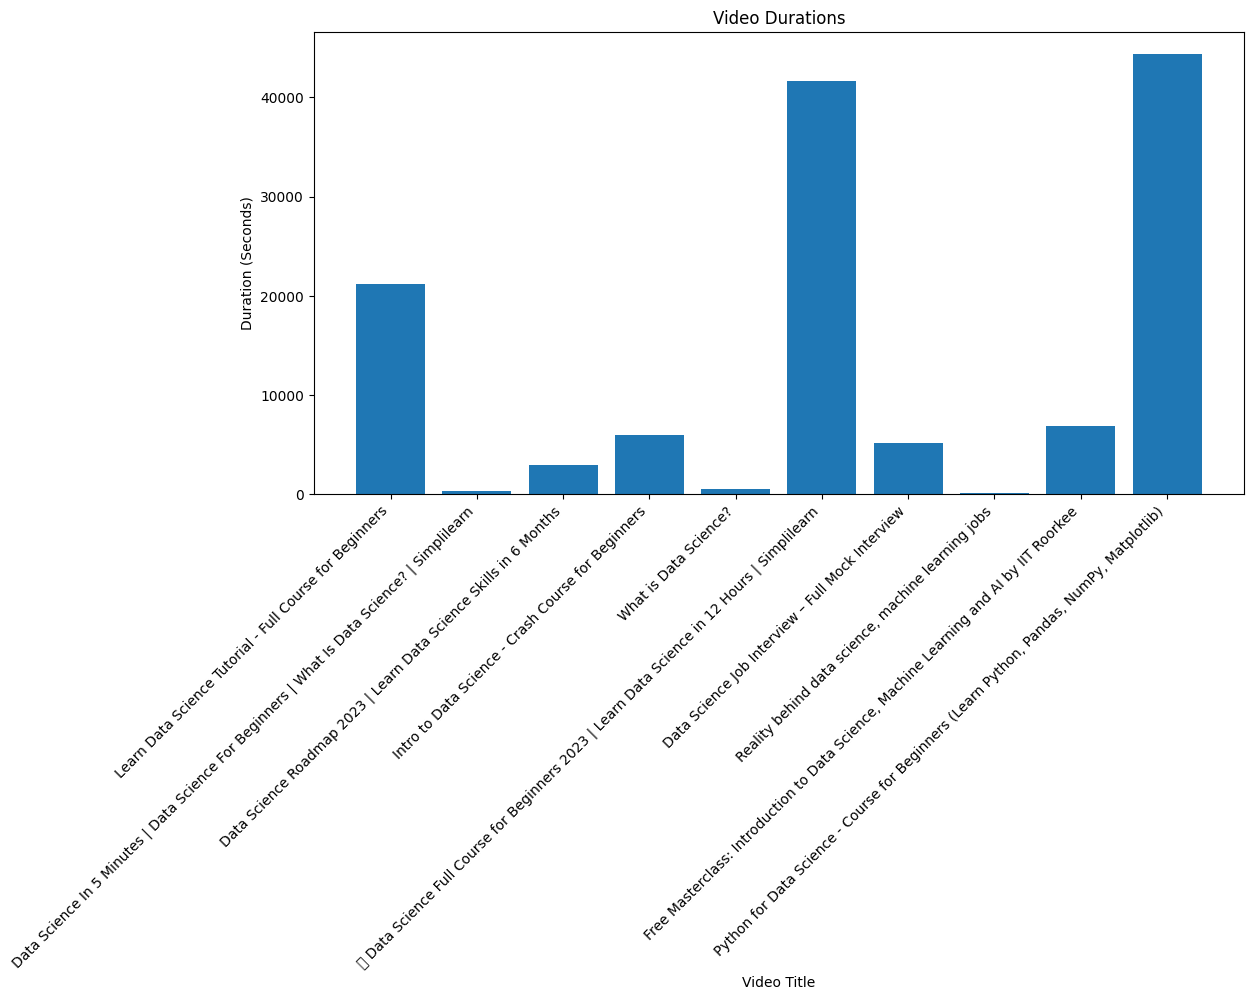

In [36]:
# Görselleştirme
plt.figure(figsize=(12, 6))
plt.bar(df_search_v2['Video Title'], df_search_v2['Duration (Seconds)'])
plt.xlabel('Video Title')
plt.ylabel('Duration (Seconds)')
plt.title('Video Durations')
plt.xticks(rotation=45, ha='right')
plt.show()